In [2]:
#%matplotlib widget

In [3]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import ariel_load_FGS
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import importlib
from tqdm import tqdm
kgs.debugging_mode = 1
kgs.profiling=False
kgs.n_workers = 6

local


In [4]:
train_data = kgs.load_all_train_data()
train_data = train_data

train_data_multi = []
train_data_single = []
for d in train_data:
    if len(d.transits)==1:
        train_data_single.append(d)
    else:
        train_data_multi.append(d)
len(train_data_multi), len(train_data_single)

train_data = train_data_multi

In [5]:
# importlib.reload(kgs)
# for d in train_data:
#     d.spectrum_cov = np.ones((283,283))
# kgs.mats_to_data(train_data, train_data, kgs.data_to_mats(train_data,train_data))
# kgs.score_metric(train_data, train_data)

In [6]:
importlib.reload(ariel_model)
todo = dict()

# model = ariel_model.baseline_model()
# model.model.run_in_parallel = True
# todo['New transit prior, alpha=1.0, FGSs=0.0001'] = model

# model = ariel_model.baseline_model()
# model.model.run_in_parallel = True
# todo['New baseline fudger2 coupling'] = model

model = ariel_model.baseline_model()
model.model.run_in_parallel = True
todo['Baseline'] = model

model = ariel_model.baseline_model()
model.model.run_in_parallel = True
model.model = ariel_model.MultiTransit(model=model.model)
todo['Multi-transit'] = model

In [7]:

kgs.sanity_checks_active = True
def fname(k):
    return kgs.temp_dir + 'evaluate_model_'+k+'__'+str(len(train_data))+'.pickle'
for k,v in todo.items():
    if not os.path.isfile(fname(k)):
        print(k)
        model = copy.deepcopy(v)
        
#         print('!!! also loader')
#         if k=='Fudger3':
            
#             model_ref = kgs.dill_load(fname('Baseline'))[1]
#             model._cached_planet_id = model_ref._cached_planet_id
#             model._cached_result = model_ref._cached_result
#             # model.bias_a = model_ref.bias_a
#             # model.bias_b = model_ref.bias_b
#             # model.sigma_fudge_FGS = model_ref.sigma_fudge[0]
#             # model.sigma_fudge_AIRS_mean = model_ref.sigma_fudge[1]
#             # model.sigma_fudge_AIRS_var = model_ref.sigma_fudge[1]
        
        # Precache data
        print('precache off')
        #for d in tqdm(train_data):
        #    copy.deepcopy(d).load_to_step(5,model.model.starter_model.loaders)
        
        
        
        #model.state=1
        model.train(train_data)
        #kgs.list_attrs(model)
        inferred_data = model.infer(train_data)
        print(k)
        print(kgs.score_metric(inferred_data, train_data))
        #print('not saving')
        #kgs.list_attrs(model)
        #if k=='Baseline':
        kgs.dill_save(fname(k), (inferred_data,train_data,model,kgs.git_commit_id))
        #print(inferred_data[0].spectrum[0], inferred_data[0].spectrum_cov[0,0])
        #print(inferred_data[-1].spectrum[0], inferred_data[-1].spectrum_cov[0,0])
    else:
        print(k)
        (inferred_data,train_data_here,model,_) = kgs.dill_load(fname(k))
        #print(model.model.model_options.FGS_order)
        print(kgs.score_metric(inferred_data, train_data_here))

Baseline
Score:           0.5697
RMS error FGS:   457.29501 ppm
mRMS error FGS:  59.41697 ppm
RMS error AIRS:  336.39264 ppm
mRMS error AIRS: 63.09299 ppm
RMS error AIRSv: 110.20964 ppm
mRMS error AIRSv:36.89224 ppm
(0.5697147197089694, 0.00045729501436925, 0.0003363926442832426)
Multi-transit
Score:           0.5869
RMS error FGS:   455.53593 ppm
mRMS error FGS:  49.73226 ppm
RMS error AIRS:  324.51838 ppm
mRMS error AIRS: 44.78871 ppm
RMS error AIRSv: 92.70473 ppm
mRMS error AIRSv:30.42907 ppm
(0.5868980070836148, 0.0004555359323736587, 0.0003245183812111167)


evaluate_model_Baseline__989.pickle
[0.9997695104271962, 0.9979456445626868]
[-4.065215873763447e-06, 9.33592180070284e-06]
[1.8776121081821406e-05, 2.6029436812163803e-05]
2.084839534925258 1.4839556166359356 1.398884927160709
Score:           0.6125
RMS error FGS:   145.66987 ppm
mRMS error FGS:  56.20423 ppm
RMS error AIRS:  121.97602 ppm
mRMS error AIRS: 61.50172 ppm
RMS error AIRSv: 64.20976 ppm
mRMS error AIRSv:39.49912 ppm
(0.6124635067351343, 0.0001456698650463143, 0.00012197601763753158)


No fudge
Score:           0.5394
RMS error FGS:   145.66987 ppm
mRMS error FGS:  56.20423 ppm
RMS error AIRS:  121.97602 ppm
mRMS error AIRS: 61.50172 ppm
RMS error AIRSv: 64.20976 ppm
mRMS error AIRSv:39.49912 ppm
FGS
1843015807, ratio:0.165, x:1.570e-02, y:2.595e-03, RMS:2.270e-03
94572221, ratio:0.084, x:5.648e-03, y:-4.761e-04, RMS:4.722e-04
AIRS
1843015807, ratio:0.142, x:1.600e-02, y:2.267e-03, RMS:2.270e-03
94572221, ratio:0.083, x:5.666e-03, y:-4.719e-04, RMS:4.722e-04


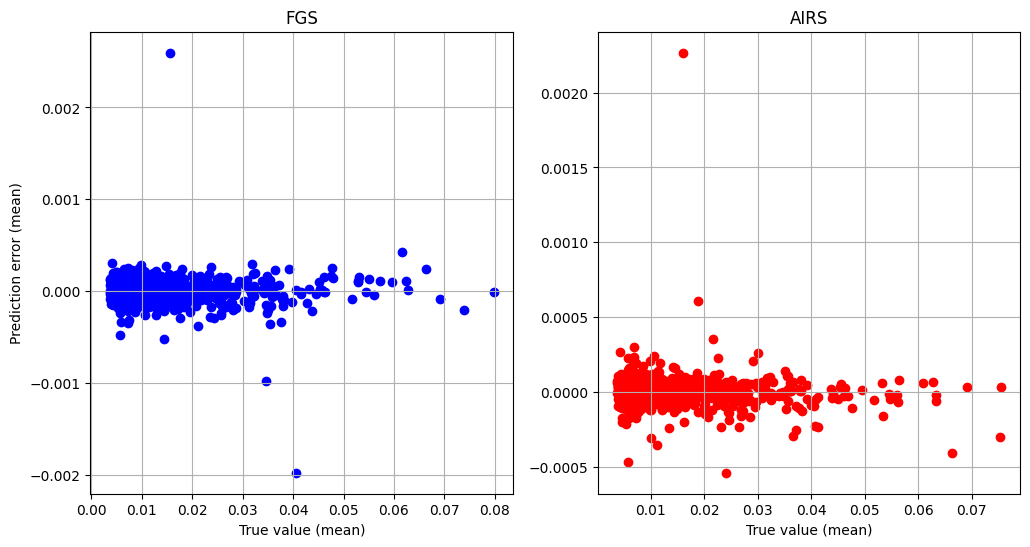

FGS
3786449677, ratio:25.377, x:7.774e-05, y:-1.973e-03, RMS:4.953e-04
94572221, ratio:20.907, x:2.277e-05, y:-4.761e-04, RMS:4.722e-04
AIRS
94572221, ratio:24.321, x:1.940e-05, y:-4.719e-04, RMS:4.722e-04
2270815333, ratio:16.851, x:3.212e-05, y:-5.413e-04, RMS:1.068e-03


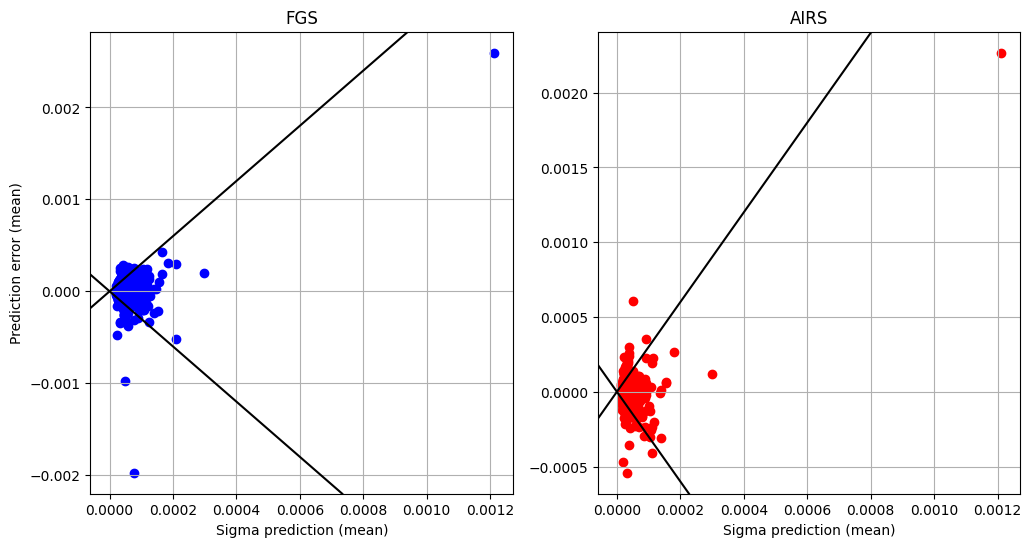

FGS
3669562759, ratio:25956342.865, x:4.804e-08, y:1.247e+00, RMS:2.456e-05
4084207590, ratio:23053267.497, x:2.447e-08, y:5.641e-01, RMS:2.198e-05
AIRS
4084207590, ratio:26753972.677, x:2.447e-08, y:6.546e-01, RMS:2.198e-05
3669562759, ratio:22050229.798, x:4.804e-08, y:1.059e+00, RMS:2.456e-05


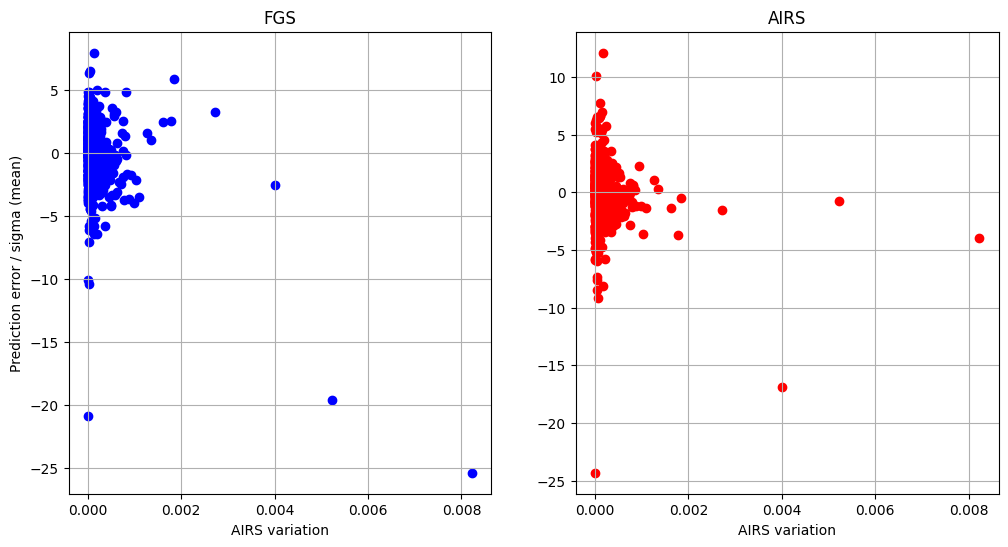

AIRS variation
2270815333, ratio:10.248, x:9.002e-05, y:9.225e-04, RMS:1.068e-03
3786449677, ratio:3.821, x:1.110e-04, y:4.241e-04, RMS:4.953e-04


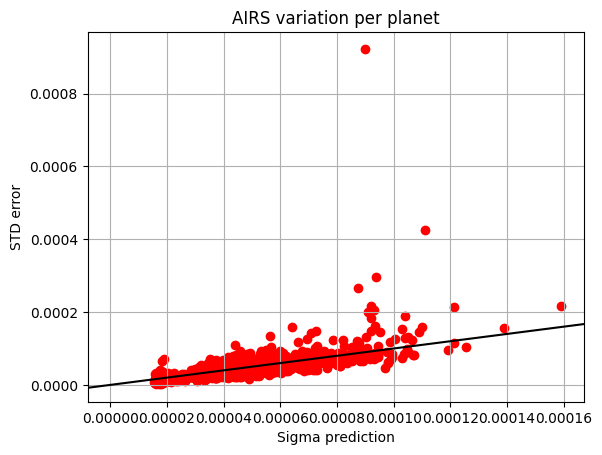

FGS
4084207590, ratio:20986983.893, x:2.447e-08, y:5.135e-01, RMS:2.198e-05
3669562759, ratio:9321491.387, x:4.804e-08, y:4.478e-01, RMS:2.456e-05
AIRS
4084207590, ratio:20986983.893, x:2.447e-08, y:5.135e-01, RMS:2.198e-05
3669562759, ratio:9321491.387, x:4.804e-08, y:4.478e-01, RMS:2.456e-05


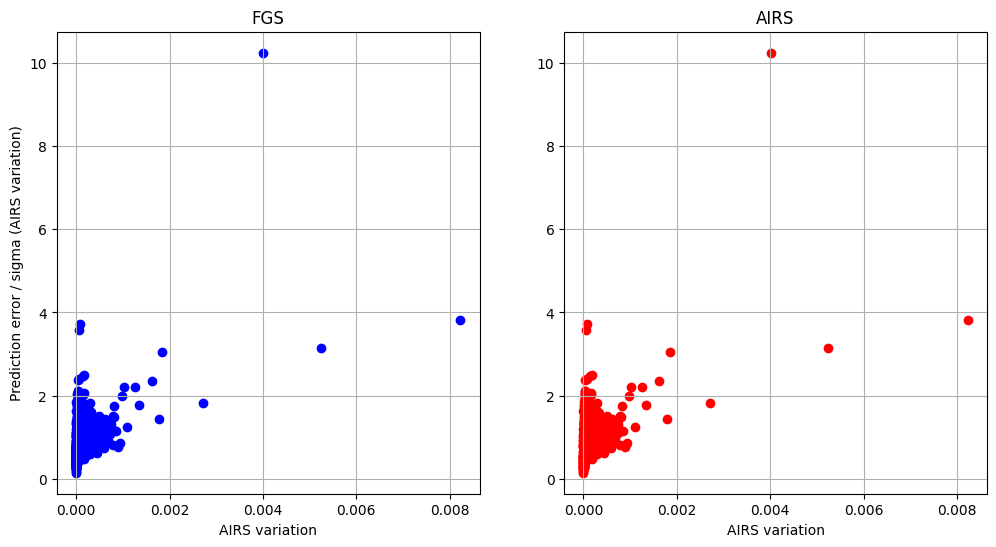

evaluate_model_Baseline__110.pickle
[1.0031437439942397, 0.9990476996411177]
[-5.069312723737785e-05, -1.1867725621253247e-05]
[-7.018704970158687e-09, -7.384126717395939e-09]
3.4868884853928304 3.0684050908523828 1.37208028628927
Score:           0.5697
RMS error FGS:   457.29501 ppm
mRMS error FGS:  59.41697 ppm
RMS error AIRS:  336.39264 ppm
mRMS error AIRS: 63.09299 ppm
RMS error AIRSv: 110.20964 ppm
mRMS error AIRSv:36.89224 ppm
(0.5697147197089694, 0.00045729501436925, 0.0003363926442832426)


No fudge
Score:           0.3398
RMS error FGS:   457.29501 ppm
mRMS error FGS:  59.41697 ppm
RMS error AIRS:  336.39264 ppm
mRMS error AIRS: 63.09299 ppm
RMS error AIRSv: 110.20964 ppm
mRMS error AIRSv:36.89224 ppm
FGS
3649218579, ratio:0.103, x:3.026e-02, y:3.115e-03, RMS:2.645e-03
576917580, ratio:0.102, x:1.946e-02, y:1.995e-03, RMS:1.527e-03
AIRS
2554492145, ratio:0.105, x:1.086e-02, y:1.136e-03, RMS:1.147e-03
3649218579, ratio:0.086, x:3.061e-02, y:2.643e-03, RMS:2.645e-03


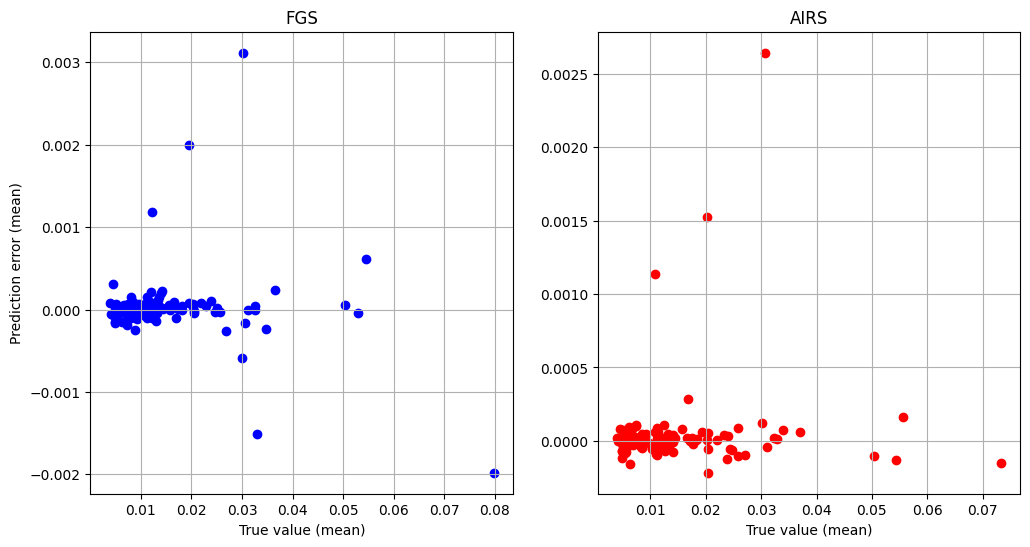

FGS
1349926825, ratio:24.213, x:8.178e-05, y:-1.980e-03, RMS:1.014e-03
2554492145, ratio:13.721, x:8.580e-05, y:1.177e-03, RMS:1.147e-03
AIRS
2554492145, ratio:21.009, x:5.407e-05, y:1.136e-03, RMS:1.147e-03
3649218579, ratio:11.686, x:2.261e-04, y:2.643e-03, RMS:2.645e-03


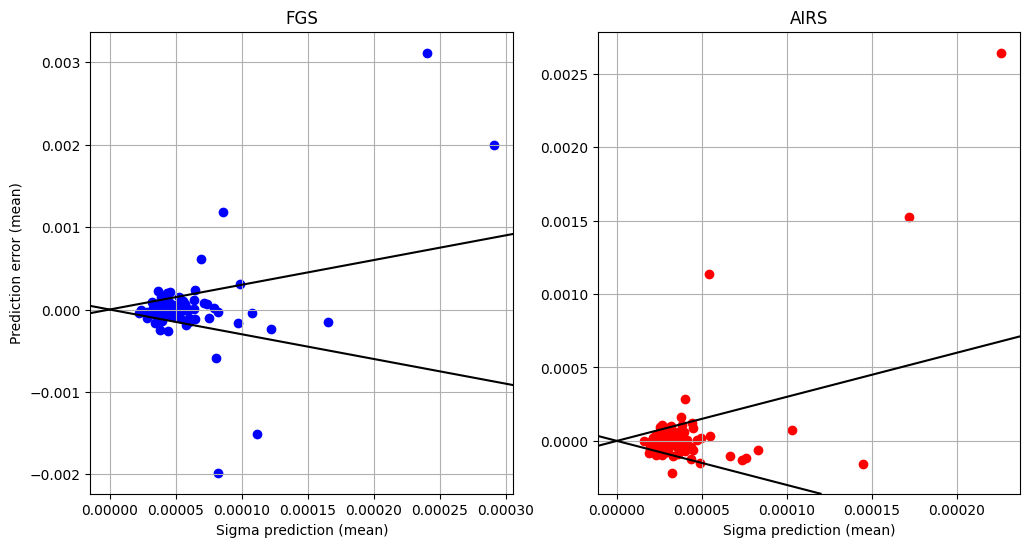

FGS
1068494784, ratio:3914061.757, x:6.186e-07, y:-2.421e+00, RMS:7.999e-05
3167096237, ratio:2634225.720, x:6.286e-07, y:-1.656e+00, RMS:1.004e-05
AIRS
1068494784, ratio:2634345.975, x:6.186e-07, y:-1.630e+00, RMS:7.999e-05
1293223638, ratio:2262296.152, x:1.395e-06, y:-3.157e+00, RMS:1.286e-04


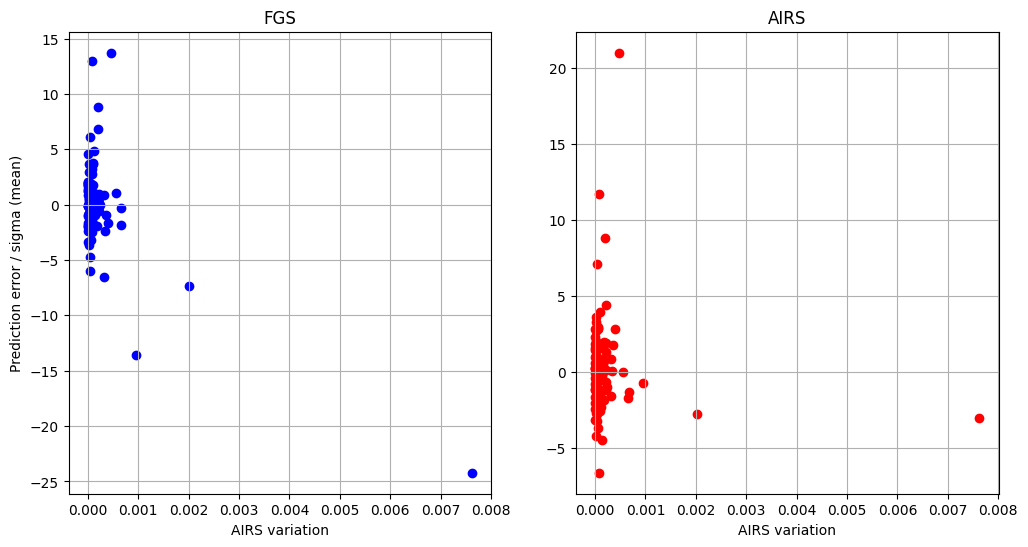

AIRS variation
1349926825, ratio:10.414, x:9.584e-05, y:9.981e-04, RMS:1.014e-03
2609891029, ratio:2.709, x:9.209e-05, y:2.494e-04, RMS:2.791e-04


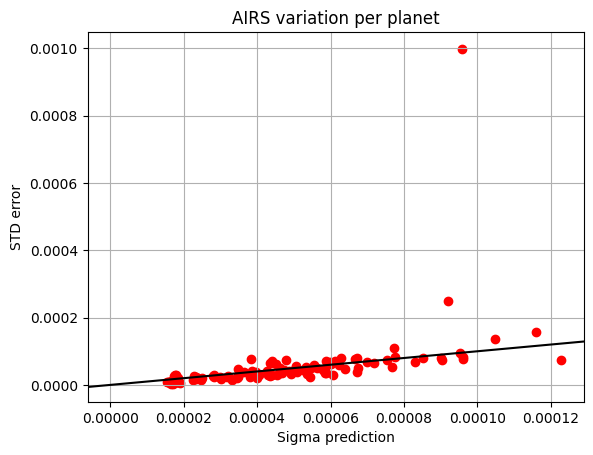

FGS
1293223638, ratio:1408073.048, x:1.395e-06, y:1.965e+00, RMS:1.286e-04
1068494784, ratio:1257404.156, x:6.186e-07, y:7.779e-01, RMS:7.999e-05
AIRS
1293223638, ratio:1408073.048, x:1.395e-06, y:1.965e+00, RMS:1.286e-04
1068494784, ratio:1257404.156, x:6.186e-07, y:7.779e-01, RMS:7.999e-05


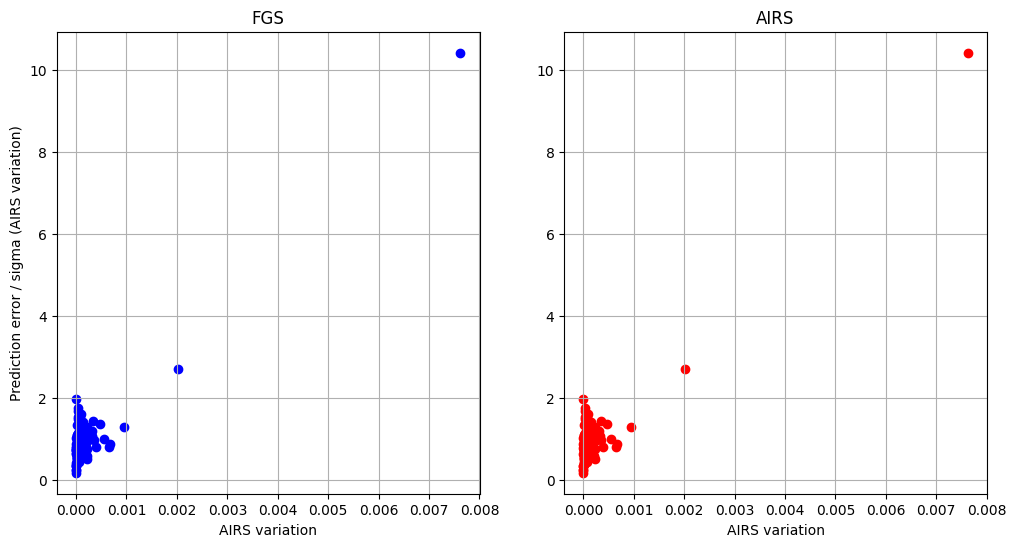

evaluate_model_Multi-transit__110.pickle
[1.0032875438314406, 0.9995992871171717]
[-5.9487154834233374e-05, -1.795517663064775e-05]
[-7.270091486607813e-09, -7.166839935008636e-09]
4.686714178441335 3.779074945860093 1.6559420940099165
Score:           0.5869
RMS error FGS:   455.53593 ppm
mRMS error FGS:  49.73226 ppm
RMS error AIRS:  324.51838 ppm
mRMS error AIRS: 44.78871 ppm
RMS error AIRSv: 92.70473 ppm
mRMS error AIRSv:30.42907 ppm
(0.5868980070836148, 0.0004555359323736587, 0.0003245183812111167)


No fudge
Score:           0.1467
RMS error FGS:   455.53593 ppm
mRMS error FGS:  49.73226 ppm
RMS error AIRS:  324.51838 ppm
mRMS error AIRS: 44.78871 ppm
RMS error AIRSv: 92.70473 ppm
mRMS error AIRSv:30.42907 ppm
FGS
576917580, ratio:0.105, x:1.946e-02, y:2.045e-03, RMS:1.563e-03
2554492145, ratio:0.103, x:1.214e-02, y:1.248e-03, RMS:1.092e-03
AIRS
2554492145, ratio:0.100, x:1.086e-02, y:1.083e-03, RMS:1.092e-03
3649218579, ratio:0.085, x:3.061e-02, y:2.593e-03, RMS:2.595e-03


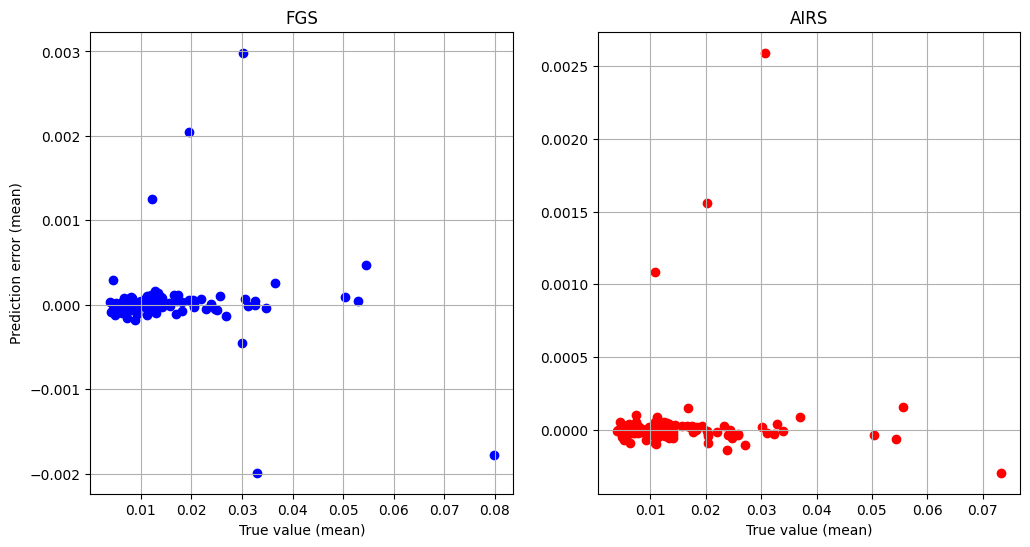

FGS
1349926825, ratio:31.024, x:5.747e-05, y:-1.783e-03, RMS:8.918e-04
1473180683, ratio:25.086, x:7.928e-05, y:-1.989e-03, RMS:1.757e-04
AIRS
2554492145, ratio:28.275, x:3.832e-05, y:1.083e-03, RMS:1.092e-03
3649218579, ratio:16.179, x:1.602e-04, y:2.593e-03, RMS:2.595e-03


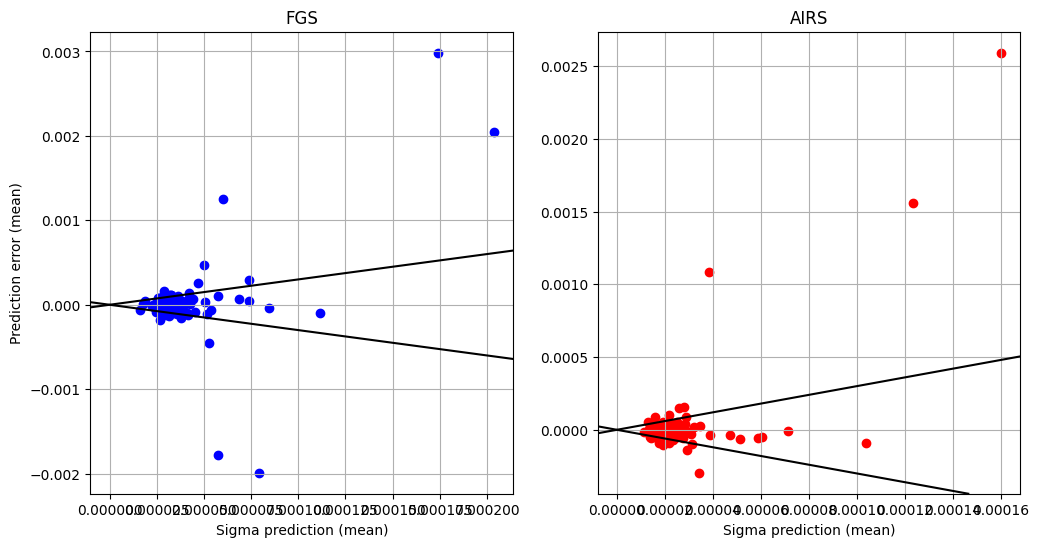

FGS
3167096237, ratio:5835554.842, x:6.286e-07, y:-3.669e+00, RMS:1.602e-05
1068494784, ratio:4173115.839, x:6.186e-07, y:-2.582e+00, RMS:4.617e-05
AIRS
1068494784, ratio:2342902.933, x:6.186e-07, y:-1.449e+00, RMS:4.617e-05
3167096237, ratio:1914714.200, x:6.286e-07, y:-1.204e+00, RMS:1.602e-05


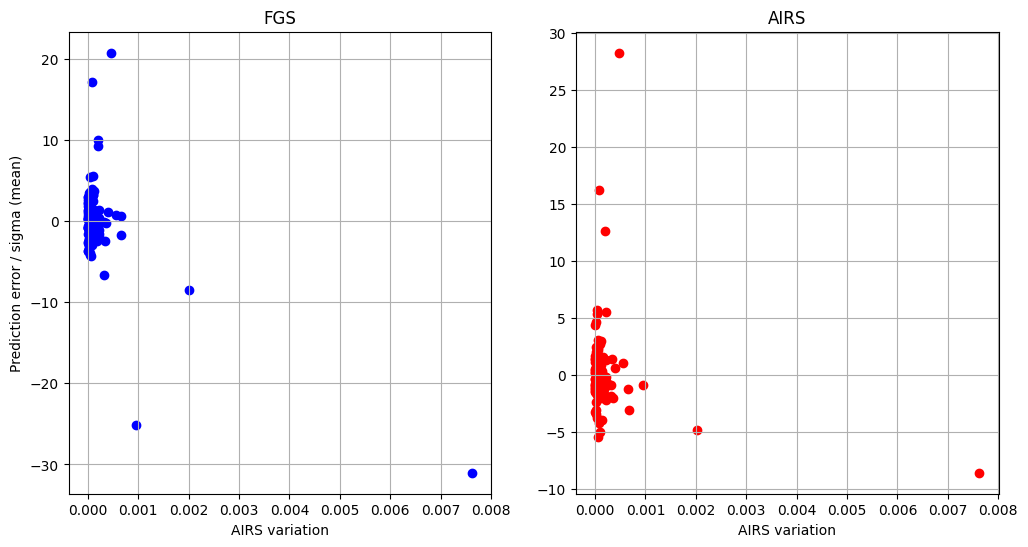

AIRS variation
1349926825, ratio:12.424, x:6.733e-05, y:8.365e-04, RMS:8.918e-04
2609891029, ratio:3.620, x:6.255e-05, y:2.264e-04, RMS:2.676e-04


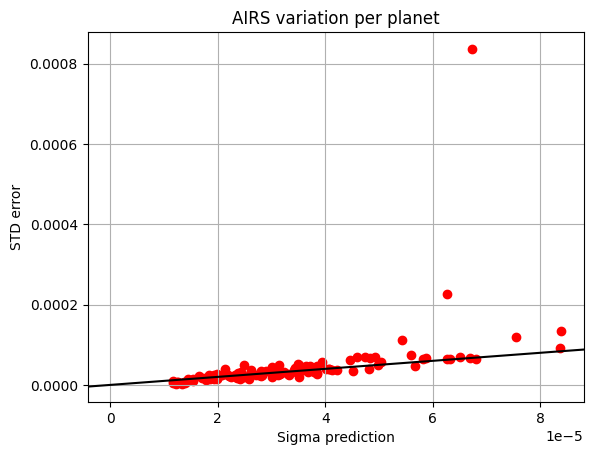

FGS
1293223638, ratio:1432067.623, x:1.395e-06, y:1.998e+00, RMS:6.070e-05
1068494784, ratio:1245094.397, x:6.186e-07, y:7.703e-01, RMS:4.617e-05
AIRS
1293223638, ratio:1432067.623, x:1.395e-06, y:1.998e+00, RMS:6.070e-05
1068494784, ratio:1245094.397, x:6.186e-07, y:7.703e-01, RMS:4.617e-05


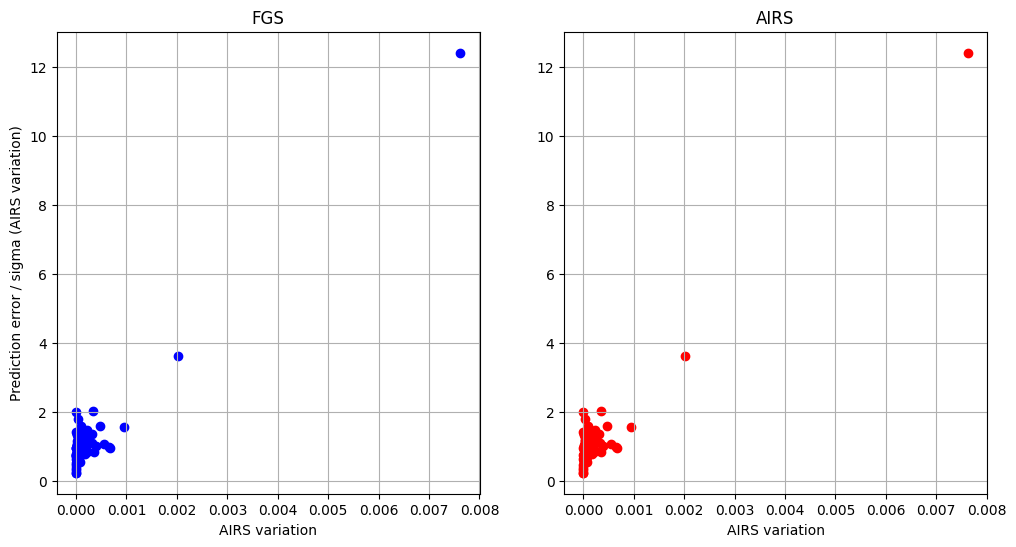

In [9]:
ignore_bad_planets = False
def filter_bad_data(data):
    data_out = []
    for d in data:
        if not d.planet_id in [1349926825, 3786449677, 2554492145, 1267010874, 94572221, 2270815333, 3649218579, 576917580, 2154305089, 2207815333, 2740910036]:
            data_out.append(d)
    return data_out
        
def basics():
    plt.grid(True)
    plt.box(True)
def plot_two_sensors(func, xl, yl, mod):
    _,ax = plt.subplots(1,2,figsize=(12,6))
    plt.sca(ax[0]);basics()
    plt.title('FGS')
    plt.xlabel(xl)
    plt.ylabel(yl)
    func(slice(0,1), 'blue', 'FGS')
    mod()
    
    plt.sca(ax[1]);basics()
    plt.title('AIRS')
    plt.xlabel(xl)
    func(slice(1,283), 'red', 'AIRS')
    mod()
    
    plt.pause(0.001)

def report_extreme_ratios(x,y,name):
    
    print(name)
    inds = np.argsort(np.abs(y/x))[::-1]
    for ii in inds[:2]:
        print(f'{inferred_data[ii].planet_id}, ratio:{np.abs(y[ii]/x[ii]):.3f}, x:{x[ii]:.3e}, y:{y[ii]:.3e}, RMS:{kgs.rms(error_matrix[ii,:]):.3e}')
    
    
fname_list = [fname(k) for k in todo.keys()]
fname_list = ['evaluate_model_Baseline__989.pickle', 'evaluate_model_Baseline__110.pickle', 'evaluate_model_Multi-transit__110.pickle']
for f in fname_list:
    (inferred_data,train_data_here,model,_) = kgs.dill_load(kgs.temp_dir+f)
    if ignore_bad_planets:
        inferred_data = filter_bad_data(inferred_data)
        train_data_here = filter_bad_data(train_data_here)
    else:
        train_data_here = train_data_here
    #model.bias_a[0]+=0.006
    #model.bias_a[1]-=0.0002
    #inferred_data = model.infer(train_data)
    
    
    print(f)
    print(model.bias_a)
    print(model.bias_b)
    print(model.sigma_offset)
    print(model.sigma_fudge_FGS, model.sigma_fudge_AIRS_mean, model.sigma_fudge_AIRS_var)
    
    print(kgs.score_metric(inferred_data, train_data_here,print_results=True))
    print('')
    
    
    
    
    #try:
    #    print(model.sigma_offset)
    #except: pass
    #print(model.sigma_fudge)    
    #kgs.list_attrs(model)
    #kgs.score_metric(inferred_data, train_data_here)
    print('')
    #print('3')
    #kgs.score_metric(inferred_data[:3], train_data_here[:3]) 
    #print('')
    print('No fudge')
    #model.sigma_fudge = [1,1]
    #try: model.sigma_offset = [0,0]
    #except: pass
    #model.bias_a = [1,1]
    #model.bias_b = [0,0]
    # print('!!!')
    model.sigma_offset = [0,0]
    model.sigma_fudge_FGS = 1.
    model.sigma_fudge_AIRS_mean = 1.
    model.sigma_fudge_AIRS_var = 1.
    inferred_data = model.infer(train_data_here)
    if ignore_bad_planets:
        inferred_data = filter_bad_data(inferred_data)
    kgs.score_metric(inferred_data, train_data_here)     
    error_matrix = np.array([d.spectrum - t.spectrum for d,t in zip(inferred_data,train_data_here)])
    true_matrix = np.array([t.spectrum for d,t in zip(inferred_data,train_data_here)])
    
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
        
    plot_two_sensors(plot_prediction_vs_true, 'True value (mean)', 'Prediction error (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = [np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data]
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
    def mod():
        plt.axline((0,0), slope=3, color='black')
        plt.axline((0,0), slope=-3, color = 'black')        
    plot_two_sensors(plot_mean_error_vs_sigma, 'Sigma prediction (mean)', 'Prediction error (mean)', mod)
    
#     def plot_mean_error_vs_sigma(slic,col, name):
#         x = np.mean(true_matrix[:,slic],1)
#         y = np.mean(error_matrix[:,slic],1) / np.array([np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data])
#         plt.scatter(x,y,color = col)
#         report_extreme_ratios(x,y,name)    
#     plot_two_sensors(plot_mean_error_vs_sigma, 'True value (mean)', 'Prediction error / sigma (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = np.std(true_matrix[:,1:],1)
        y = np.mean(error_matrix[:,slic],1) / np.array([np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data])
        #y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)    
    plot_two_sensors(plot_mean_error_vs_sigma, 'AIRS variation', 'Prediction error / sigma (mean)', lambda:0)
    
    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel('Sigma prediction')
    plt.ylabel('STD error')
    n=282
    x=np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
    y=np.sqrt(np.var(error_matrix[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    report_extreme_ratios(x,y,'AIRS variation')    
    plt.pause(0.001)
    
#     def plot_mean_error_vs_sigma(slic,col, name):
#         x = np.mean(true_matrix[:,slic],1)
#         y = np.sqrt(np.var(error_matrix[:,1:],1)) / np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
#         plt.scatter(x,y,color = col)
#         report_extreme_ratios(x,y,name)    
#     plot_two_sensors(plot_mean_error_vs_sigma, 'True value (mean)', 'Prediction error / sigma (AIRS variation)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = np.std(true_matrix[:,1:],1)
        y = np.sqrt(np.var(error_matrix[:,1:],1)) / np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)    
    plot_two_sensors(plot_mean_error_vs_sigma, 'AIRS variation', 'Prediction error / sigma (AIRS variation)', lambda:0)
    
    
    

In [22]:
compare1= list(todo.keys())[0]
data1 = kgs.dill_load(fname(compare1))[0]
if ignore_bad_planets:
    data1 = filter_bad_data(data1)
for k,v in todo.items():    
    compare2= k
    if compare2==compare1:
        continue    
    data2 = kgs.dill_load(fname(compare2))[0]
    if ignore_bad_planets:
        data2 = filter_bad_data(data2)
        train_data_here = filter_bad_data(train_data)
    else:
        train_data_here = train_data           
    error1 = np.array([d.spectrum - t.spectrum for d,t in zip(data1,train_data_here)])
    error2 = np.array([d.spectrum - t.spectrum for d,t in zip(data2,train_data_here)])
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(error1[:,slic],1)
        y = np.mean(error2[:,slic],1)
        plt.scatter(x,y,color = col)

    plot_two_sensors(plot_prediction_vs_true, compare1+' (mean)', compare2+' (mean)', lambda:plt.axline((0,0),slope=1,color='black'))

    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel(compare1)
    plt.ylabel(compare2)
    x=np.sqrt(np.var(error1[:,1:],1))
    y=np.sqrt(np.var(error2[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    plt.pause(0.001)

In [9]:
# import subprocess

# # Hibernate Windows
# subprocess.run(
#     ["/mnt/c/Windows/System32/shutdown.exe", "/h"],  # add "/f" to force-close apps
#     check=True
# )